# Human Activity Recognition with Smartphones

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

30 participants(referred as subjects in this dataset) performed activities of daily living while carrying a waist-mounted smartphone. The phone was configured to record two implemented sensors (accelerometer and gyroscope). For these time series the directors of the underlying study performed feature generation and generated the dataset by moving a fixed-width window of 2.56s over the series. Since the windows had 50% overlap the resulting points are equally spaced (1.28s).This experiment was video recorded to label the data manually.

## Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Train Data

In [3]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')

y_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze('columns')
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5832,0.226356,-0.033459,-0.184920,-0.158608,-0.040387,-0.409728,-0.285110,-0.044355,-0.423024,0.027322,...,0.199059,-0.444363,-0.966239,0.351607,-0.766257,0.259570,0.011828,26,2,WALKING_UPSTAIRS
7036,0.273932,-0.017533,-0.106616,-0.994634,-0.995730,-0.993724,-0.995472,-0.995270,-0.992263,-0.934134,...,-0.153394,0.218744,0.353205,-0.172488,0.512657,-0.390064,-0.616874,30,6,LAYING


In [4]:
train.shape

(7352, 564)

### Test Data

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')

y_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze('columns')
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1049,0.213687,0.032561,-0.104960,-0.197134,0.030564,-0.220324,-0.256309,0.072790,-0.202411,0.099647,...,0.476074,-0.820175,-0.853793,0.853178,-0.732997,0.282555,0.012282,10,2,WALKING_UPSTAIRS
2604,0.262267,-0.004271,-0.084181,-0.993301,-0.968733,-0.948973,-0.993872,-0.966125,-0.947974,-0.943478,...,0.008949,0.075105,0.344805,-0.089643,-0.693450,-0.086399,-0.094687,24,4,SITTING


In [6]:
test.shape

(2947, 564)

## Data Preprocessing

### 1. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


#### 3. Save this dataframe in a csv files

In [16]:
train.to_csv('UCI HAR Dataset/UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/UCI HAR Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

In [18]:
train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


### Removing extra information

In [19]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

#### 1. Investigate participants activity durations.

* Since the dataset has been created in a scientific environment nearly equal preconditions for the participants can be assumed. Let us investigate their activity durations.

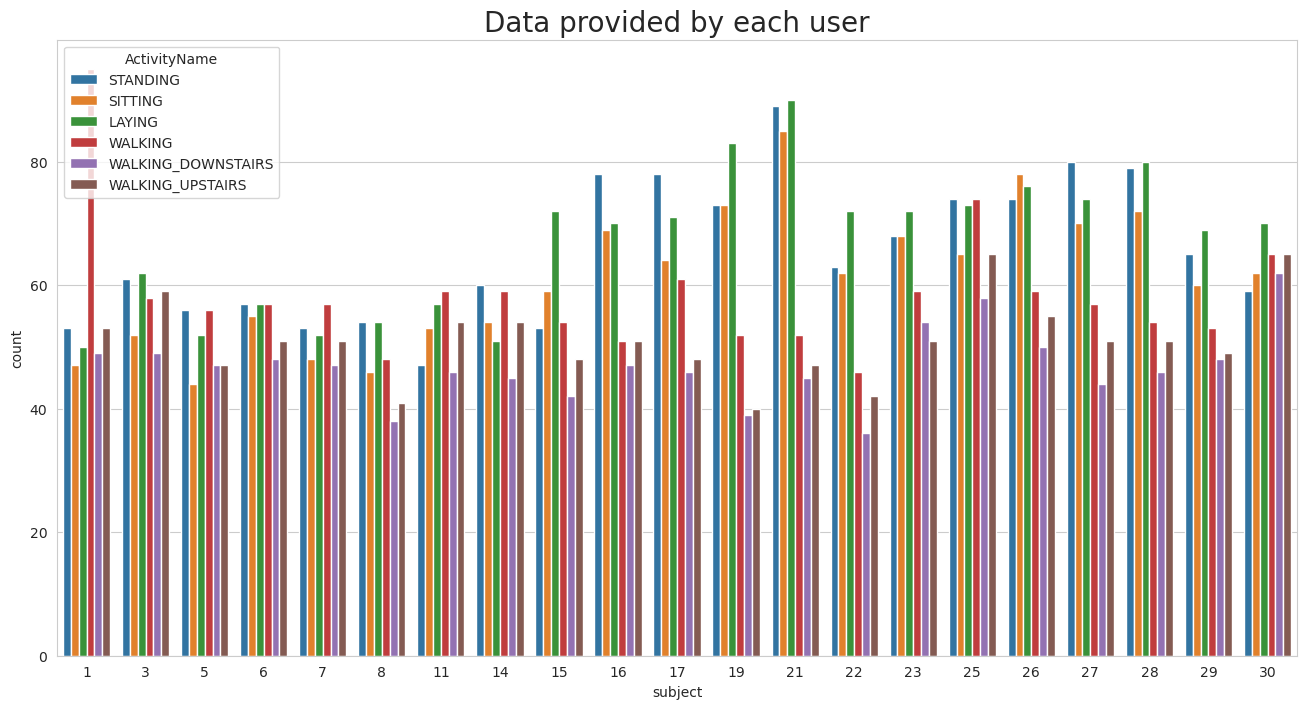

In [21]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

* Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs.

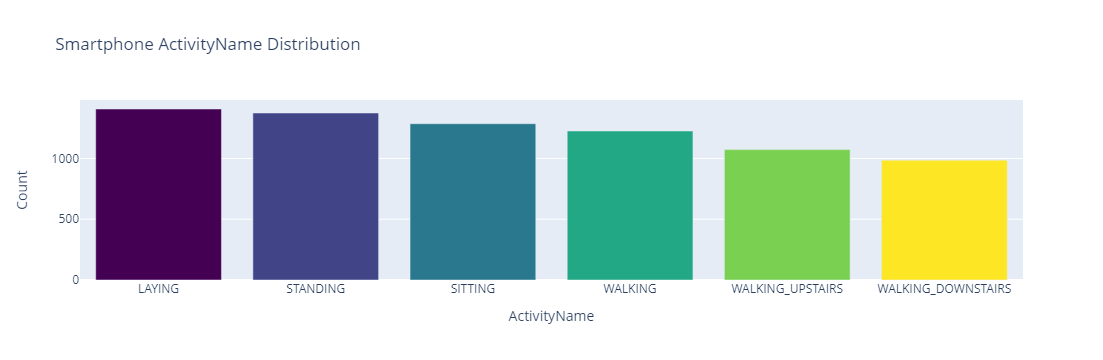

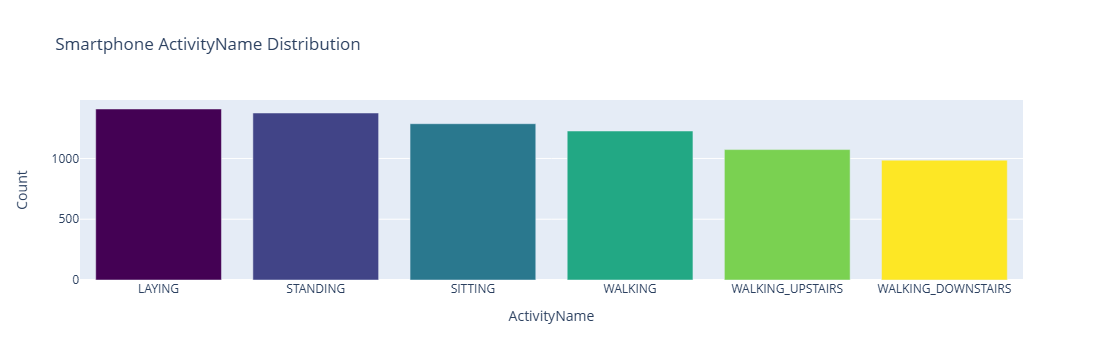

In [24]:
# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
iplot(fig)

Although there are fluctuations in the label counts, the labels are quite equally distributed.

Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs.

Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.